### The purpose of this notebook is to simulate 3 objects interacting gravitationally.

- F_g = G*M*m/r^2
- F_c = m*v^2/r
- F = m*a

### For each object, we need to sum the gravitational forces from all other objects

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/ryanjsfx/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [40]:
S_PER_MONTH = 3e6
S_PER_MONTH / 0.6 / 1e6

5.0

In [41]:
dt = 0.6

NT = 500000
NUMBER_OF_OBJECTS = 3 # Earth, Moon, ISS
QUANTITIES = 10 # times, Object_distance, Object_distanceX, Object_distanceY, Object_velocities, Object_velX, Object_velY, \
                # Object_accelerations, Object_accelX, Object_accelY

EARTH = 0
MOON  = 1
ISS   = 2

TIME = 0
POSX = 1
POSY = 2
POST = 3
VELX = 4
VELY = 5
VELT = 6
ACCX = 7
ACCY = 8
ACCT = 9

In [42]:
data = np.zeros( (NUMBER_OF_OBJECTS, QUANTITIES, NT) )

In [43]:
ISS_altitude = 4.09e5 # meters
Earth_radius = 6.37e6 # meters
G = 6.67e-11 # m^3 * kg^-1 * s^-2 [N * m^2 / kg^2]
Earth_mass = 5.97e24 # kg
ISS_mass = 4.2e5 # 420,000 kg
Moon_mass = 7.3e22 # kg
Earth_moon_separation = 384e6 # meters

# Centripetal Velocity
### F$_g$ = F$_c$
### F$_g$ = $\frac{G M m}{r^2}$
### F$_c$ = $\frac{m v^2}{r}$

In [44]:
data[ISS, POST, 0] = ISS_altitude + Earth_radius
data[ISS, POSX, 0] = ISS_altitude + Earth_radius
data[ISS, VELT, 0] = np.sqrt(G*Earth_mass / data[ISS, POST, 0])
data[ISS, VELY, 0] = np.sqrt(G*Earth_mass / data[ISS, POST, 0])
data[ISS, ACCT, 0] =  G*Earth_mass / data[ISS, POST, 0]**2
data[ISS, ACCX, 0] = -G*Earth_mass / data[ISS, POST, 0]**2

## TODO: set initial conditions for Moon
data[MOON, POST, 0] = Earth_moon_separation
data[MOON, POSX, 0] = Earth_moon_separation
data[MOON, VELT, 0] = np.sqrt(G*Earth_mass / data[MOON, POST, 0])
data[MOON, VELY, 0] = np.sqrt(G*Earth_mass / data[MOON, POST, 0])
data[MOON, ACCT, 0] =  G*Earth_mass / data[MOON, POST, 0]**2
data[MOON, ACCX, 0] = -G*Earth_mass / data[MOON, POST, 0]**2

masses = [Earth_mass, Moon_mass, ISS_mass]

In [45]:
def update_accelerations(old_index, data):
    pis = [POSX,POSY]
    ais = [ACCX,ACCY]
    
    for kk in range(len(ais)):
        ai = ais[kk]
        pi = pis[kk]
        
        for ii in range(NUMBER_OF_OBJECTS):
            temp_acc = 0
            for jj in range(NUMBER_OF_OBJECTS):
                if ii == jj:
                    continue
                    
                temp_acc += -G*masses[jj]*(data[ii,pi,old_index] - data[jj,pi,old_index]) / \
                         np.abs(data[ii,POST,old_index] - data[jj,POST,old_index])**3

            data[ii,ai,old_index+1] = temp_acc
    for ii in range(NUMBER_OF_OBJECTS):
        data[ii,ACCT,old_index+1] = np.sqrt(data[ii,ACCX,old_index+1]**2 + data[ii,ACCY,old_index+1]**2)

    return data

In [46]:
def update_velocities(old_index, data):
    vis = [VELX, VELY]
    ais = [ACCX, ACCY]
    
    for ii in range(NUMBER_OF_OBJECTS):
        for jj in range(len(vis)):
            vi = vis[jj]
            ai = ais[jj]
            
            data[ii,vi,old_index+1] = data[ii,vi,old_index] + data[ii,ai,old_index]*dt
        data[ii,VELT,old_index+1] = np.sqrt(data[ii,VELX,old_index+1]**2 + data[ii,VELY,old_index+1]**2)
    return data

In [47]:
def update_positions(old_index, data):
    pis = [POSX, POSY]
    vis = [VELX, VELY]
    ais = [ACCX, ACCY]
    for ii in range(NUMBER_OF_OBJECTS):
        for jj in range(len(pis)):
            pi = pis[jj]
            vi = vis[jj]
            ai = ais[jj]
            
            data[ii,pi,old_index+1] = data[ii,pi,old_index] + data[ii,vi,old_index]*dt + 0.5*data[ii,ai,old_index]*dt**2
        data[ii,POST,old_index+1] = np.sqrt(data[ii,POSX,old_index+1]**2 + data[ii,POSY,old_index+1]**2)
    return data

In [49]:
for index in range(1,NT):
    if index % 1000 == 0:
        print("current index: ", index)
    for ii in range(NUMBER_OF_OBJECTS):
        data[ii,TIME,index] = data[ii,TIME,index-1] + dt
        # print("ii: ", ii)
        # print("dt: ", dt)
        # print("data[ii,TIME,index]: ", data[ii,TIME,index])
        # print("data[ii,TIME,index-1]: ", data[ii,TIME,index-1])
    
    data = update_accelerations(index-1, data)
    data = update_velocities(   index-1, data)
    data = update_positions(    index-1, data)

current index:  1000
current index:  2000
current index:  3000
current index:  4000
current index:  5000
current index:  6000
current index:  7000
current index:  8000
current index:  9000
current index:  10000
current index:  11000
current index:  12000
current index:  13000
current index:  14000
current index:  15000
current index:  16000
current index:  17000
current index:  18000
current index:  19000
current index:  20000
current index:  21000
current index:  22000
current index:  23000
current index:  24000
current index:  25000
current index:  26000
current index:  27000
current index:  28000
current index:  29000
current index:  30000
current index:  31000
current index:  32000
current index:  33000
current index:  34000
current index:  35000
current index:  36000
current index:  37000
current index:  38000
current index:  39000
current index:  40000
current index:  41000
current index:  42000
current index:  43000
current index:  44000
current index:  45000
current index:  460

In [50]:
data[EARTH,TIME,1] = data[EARTH,TIME,0] + dt
print(data[EARTH,TIME,:])

[0.000000e+00 6.000000e-01 1.200000e+00 ... 2.999982e+05 2.999988e+05
 2.999994e+05]


In [51]:
print("ISS times: ", data[ISS,TIME,:])
print("ISS_distances: ", data[ISS,POST,:])
print("MOON times: ", data[MOON,TIME,:])
print("MOON distances: ", data[MOON, POST, :])

ISS times:  [0.000000e+00 6.000000e-01 1.200000e+00 ... 2.999982e+05 2.999988e+05
 2.999994e+05]
ISS_distances:  [6.77900000e+06 6.77900000e+06 6.77900000e+06 ... 5.71436825e+12
 5.71440360e+12 5.71443896e+12]
MOON times:  [0.000000e+00 6.000000e-01 1.200000e+00 ... 2.999982e+05 2.999988e+05
 2.999994e+05]
MOON distances:  [3.84000000e+08 3.84000000e+08 3.84000000e+08 ... 3.83836571e+08
 3.83836570e+08 3.83836568e+08]


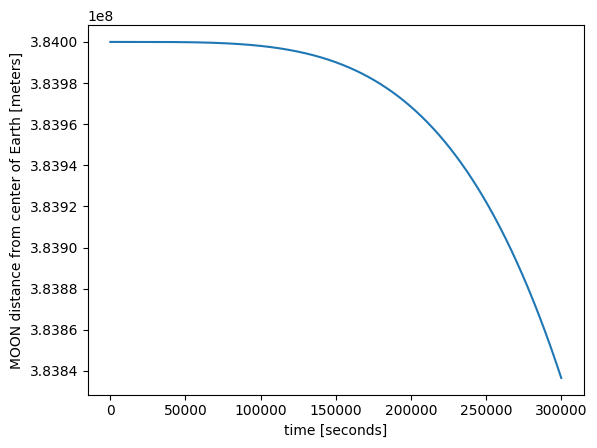

In [52]:
plt.plot(data[MOON,TIME,:], data[MOON,POST,:])
plt.xlabel("time [seconds]")
plt.ylabel("MOON distance from center of Earth [meters]")
plt.show()

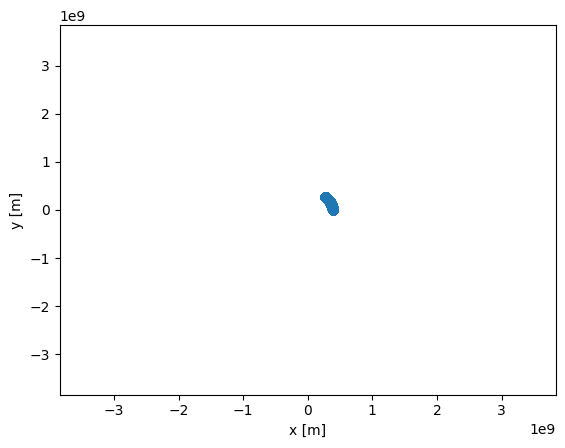

In [53]:
plt.plot(data[MOON,POSX,:], data[MOON,POSY,:], "o")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.ylim(-data[MOON,POST,0]*10, data[MOON,POST,0]*10)
plt.xlim(-data[MOON,POST,0]*10, data[MOON,POST,0]*10)
plt.show()

In [ ]:
for i in range(NT):
    plt.plot(ISS_distancesX[i], ISS_distancesY[i], "o")
    plt.xlabel("x [m]")
    plt.ylabel("y [m]")
    plt.ylim(-ISS_distances[0]*10, ISS_distances[0]*10)
    plt.xlim(-ISS_distances[0]*10, ISS_distances[0]*10)
    plt.savefig("ISS_position" + str(i).zfill(4) + ".png")
    plt.close()